In [ ]:
##plot network

In [12]:
from PIL import Image

im = Image.open("IMG_1327.jpg")
im.show()

In [ ]:
##equations

$$\begin{aligned}
\mathbf{a}_1&=W^1\mathbf{x}+\mathbf{b}_1\\
\mathbf{h}_1&=\text{max}(0, \mathbf{a}_1)\\
\mathbf{a}_2&=W^2\mathbf{h}_1+\mathbf{b}_2\\
\mathbf{h}_2&=\text{max}(0, \mathbf{a}_2)\\
\mathbf{a}_3&=V\mathbf{h}_2+\mathbf c\\
\hat{\mathbf y}&=\text{softmax}(\mathbf{a}_3)
\end{aligned}$$

In [14]:
##Write out the function in python, call itffnn2ReLu(...)
import numpy as np

def a(x,w,b):
    a_out = x.dot(w) + b
    return a_out

def ReLU(x):
    return max(0, x)

def softmax(x):
    return np.exp(x) / sum(np.exp(x))

def ff_nn_2_ReLU(x, w1, w2, v, b1, b2, c):
    num_rows, num_columns = x.shape
    y = []
    for i in range(num_rows):
        x_i = x[i,:]
        
        a11 = x_i[0]*w1[0,0] + x_i[1]*w1[1,0] + b1[0]
        a12 = x_i[0]*w1[0,1] + x_i[1]*w1[1,1] + b1[1]
        a13 = x_i[0]*w1[0,2] + x_i[1]*w1[1,2] + b1[2]
        
        h11 = ReLU(a11)
        h12 = ReLU(a12)
        h13 = ReLU(a13)
        
        a21 = h11*w2[0,0] + h12*w2[1,0] + h13*w2[2,0] + b2[0]
        a22 = h11*w2[0,1] + h12*w2[1,1] + h13*w2[2,1] + b2[1]
        
        h21 = ReLU(a21)
        h22 = ReLU(a22)
        
        a31 = h21*v[0,0] + h22*v[1,0] + c[0]
        a32 = h21*v[0,1] + h22*v[1,1] + c[1]
        a33 = h21*v[0,2] + h22*v[1,2] + c[2]
        
        a = np.array([a31, a32, a33])
        y.append(softmax(a))
        
    return np.array(y)

In [15]:
##what are the class probabilities associated with the forward pass of eachsample?

In [16]:
x = np.array([[1,-1],[0,-1],[0,1]])
w1 = np.array([[1,-1,0],[0,0,.5]])
w2 = np.array([[1,-1],[0,-1],[0,0]])
v = np.array([[1,0,-1],[1,0,-1]])
b1 = np.array([0,0,1])
b2 = np.array([1,-1])
c = np.array([1,0,0])

ff_nn_2_ReLU(x, w1, w2, v, b1, b2, c)

array([[ 0.94649912,  0.04712342,  0.00637746],
       [ 0.84379473,  0.1141952 ,  0.04201007],
       [ 0.84379473,  0.1141952 ,  0.04201007]])

f(x,y)=(1−x)2+100(y−x2)2
 

∂f/∂x=−2(1−x)−400x(y−x2)=400x3−400xy+2x−2
 
 

∂f/∂y=200(y−x2)=−200x2+200y
 
 


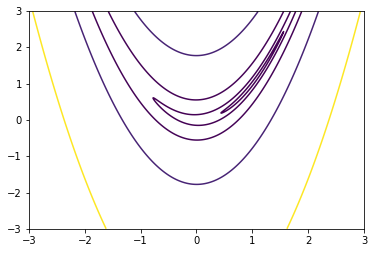

In [17]:
import matplotlib.pyplot as plt
import numpy as np
delta = 0.005
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
plt.show()

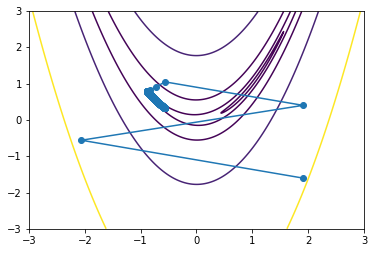

In [18]:
def grad_f(vector):
    x, y = vector
    df_dx = 400*x**3-400*x*y+2*x-2
    df_dy = -200*x**2+200*y
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=6):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

## Learning rate 0.005
traj = grad_descent(starting_point = [1.9, -1.6],  iterations = 300,
                    learning_rate = 0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

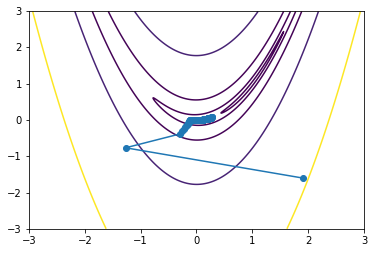

In [19]:
## Learning rate 0.002
traj = grad_descent(starting_point = [1.9, -1.6],  iterations = 300,
                    learning_rate = 0.0008)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

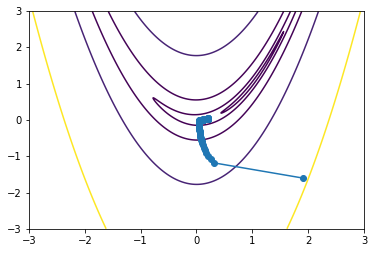

In [20]:
## Learning rate 0.001
traj = grad_descent(starting_point = [1.9, -1.6],  iterations = 300,
                    learning_rate = 0.0004)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

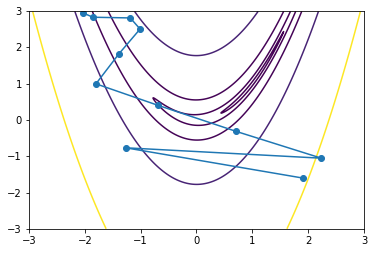

In [21]:
def grad_descent_momentum(starting_point = None, iterations=10, learning_rate=6,
                          alpha = 1):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    grad = grad_f(point)
    dx = learning_rate * grad
    point = point - dx
    trajectory.append(point)
    for i in range(iterations-1):
        grad = grad_f(point)
        dx = alpha * dx - learning_rate * grad
        point = point + dx
        trajectory.append(point)
    return np.array(trajectory)

traj = grad_descent_momentum(starting_point = [1.9, -1.6],  iterations = 10,
                             learning_rate = 0.0008, alpha = 0.8)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

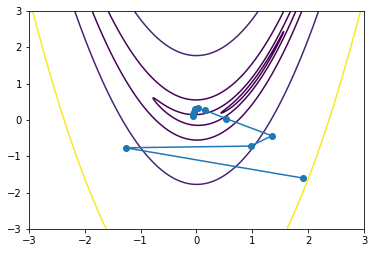

In [22]:
traj = grad_descent_momentum(starting_point = [1.9, -1.6],  iterations = 10,
                             learning_rate = 0.0008, alpha = 0.4)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

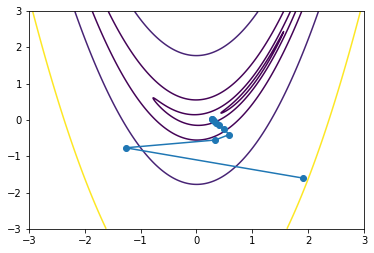

In [23]:
traj = grad_descent_momentum(starting_point = [1.9, -1.6],  iterations = 10,
                             learning_rate = 0.0008, alpha = 0.2)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()

In [24]:
from PIL import Image

im = Image.open("IMG_1328.jpg")
im.show()

In [25]:
##grad_f
def softmax(x):
    return np.exp(x) / sum(np.exp(x))

def ReLU(x):
    return np.maximum(x, 0)

def yhat(W1, W2, V, b1, b2, c, x):
    a1 = x.dot(W1) + b1
    h1 = ReLU(a1)
    a2 = h1.dot(W2) + b2
    h2 = ReLU(a2)
    a3 = h2.dot(V) + c
    return softmax(a3)

def forward(parameters, x):
    W1, W2, V, b1, b2, c = parameters
    a1 = x.dot(W1) + b1
    h1 = ReLU(a1)
    a2 = h1.dot(W2) + b2
    h2 = ReLU(a2)
    a3 = h2.dot(V) + c
    y_hat = softmax(a3)
    return a1, h1, a2, h2, a3, y_hat
    
def loss(y, y_hat):
    tot = y * np.log(y_hat)
    return -tot.sum()

def grad_f(parameters, x, y):
    W1, W2, V, b1, b2, c = parameters
    a1, h1, a2, h2, a3, y_hat = forward(parameters, x)
    
    dW1 = x.T.dot(((y_hat - y).dot(V.T)*(h2 > 0)).dot(W2.T)*(h1 > 0))
    dW2 = h1.T.dot(((y_hat - y).dot(V.T)*(h2>0)))
    dV = h2.T.dot(y_hat - y)
    db1 = (((y_hat - y).dot(V.T)*(h2 > 0)).dot(W2.T)*(h1 > 0)).sum(axis=0)
    db2 = ((y_hat - y).dot(V.T)*(h2>0)).sum(axis=0)
    dc = (y_hat - y).sum(axis=0)
    
    return [dW1, dW2, dV, db1, db2, dc]

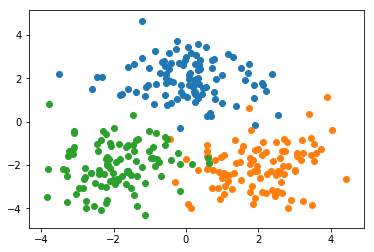

In [26]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(29)
mu1 = np.array([0,2])
mu2 = np.array([2,-2])
mu3 = np.array([-2,-2])
sigma = np.array([[1,0],[0,1]])
n = 100
a = np.random.multivariate_normal(mean = mu1, cov = sigma, size = n)
b = np.random.multivariate_normal(mean = mu2, cov = sigma, size = n)
c = np.random.multivariate_normal(mean = mu3, cov = sigma, size = n)
plt.scatter(a[:,0], a[:,1])
plt.scatter(b[:,0], b[:,1])
plt.scatter(c[:,0], c[:,1])
plt.show()
X = np.concatenate([a,b,c])
Y = np.array([[1,0,0] for i in range(n)] +
             [[0,1,0] for i in range(n)] +
             [[0,0,1] for i in range(n)])

In [27]:
def grad_descent(x, y, parameters, iterations=10, learning_rate=1e-2):
    W1, W2, V, b1, b2, c = parameters
    point = parameters
    trajectory = [point]
    losses = [loss(y, yhat(W1, W2, V, b1, b2, c, x))]
    
    for i in range(iterations):
        grad = grad_f(parameters, x, y)
        point = np.subtract(point, [learning_rate * i for i in grad])
        trajectory.append(point)
        losses.append(loss(y, forward(point, x)[5]))
    return (np.array(trajectory), losses)

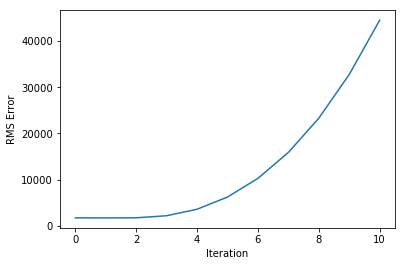

In [31]:
np.random.seed(1999)
W1 = np.random.uniform(-.1,.1,size=6).astype("float64").reshape(2,3)
W2 = np.random.uniform(-.1,.1,size=6).astype("float64").reshape(3,2)
V = np.random.uniform(-.1,.1,size=6).astype("float64").reshape(2,3)
b1 = np.random.uniform(-.1,.1,size=3).astype("float64").reshape(1,3)
b2 = np.random.uniform(-.1,.1,size=2).astype("float64").reshape(1,2)
c = np.random.uniform(-.1,.1,size=3).astype("float64").reshape(1,3)
parameters = np.array([W1, W2, V, b1, b2, c])
traj, losses = grad_descent(X,Y,parameters,iterations=10,learning_rate=0.1)

plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")
plt.show()

In [32]:
def grad_descent_momentum(x, y, parameters, iterations = 10, learning_rate = 1e-2,
                          alpha = 0.8):
    W1, W2, V, b1, b2, c = parameters
    point = parameters
    trajectory = [point]
    losses = [loss(y, yhat(W1, W2, V, b1, b2, c, x))]
    v = [np.zeros(np.shape(i)) for i in parameters]
    
    for i in range(iterations):
        grad = grad_f(parameters, x, y)
        v = np.add([learning_rate * i for i in v], [alpha * i for i in grad])
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, forward(point, x)[5]))
    return (np.array(trajectory), losses)

/Users/taoranyu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/taoranyu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/taoranyu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
/Users/taoranyu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


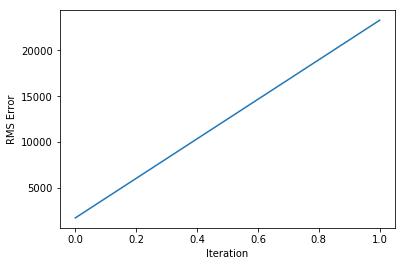

In [33]:
traj, losses = grad_descent_momentum(X,Y,parameters,iterations=10,learning_rate=0.1,
                                     alpha=0.8)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")
plt.show()